In [1]:
%pylab inline
import h5py
from scipy import signal
from ising import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
shp = (128,128)
x = np.random.binomial(1, 0.5, shp)
x[ x==0 ] = -1

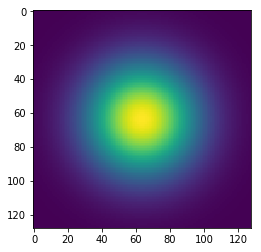

In [3]:
gbk = gaussian_beam_kernel(shp, 23)
imshow(gbk)

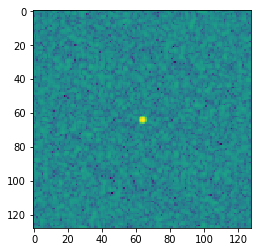

In [4]:
I = scatter_lattice(x, beam_kernel=gbk)
imshow(np.log(I), vmax=15)

Compute correlation functions

In [5]:
f = h5py.File('ising_bj2.000000_shape64-64.h5')
print f.keys()
mags = array(f['mags'])
lattices = array(f['lattices'])
f.close()

[u'accepted', u'energies', u'lattices', u'mags']


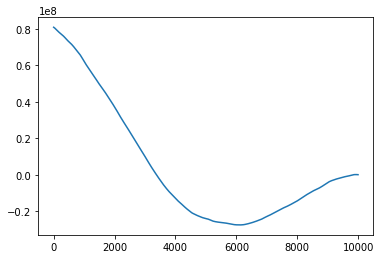

In [6]:
# time correlation
time_acf = np.correlate(mags, mags, 'full')[len(mags):]
plot(time_acf)

1.0


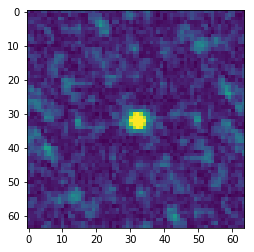

In [7]:
space_acf = lattice_spatial_correlation(lattices).mean(0)
imshow(space_acf, vmax=0.1)

31 31


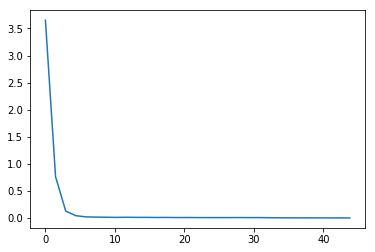

In [33]:
def radial_average(image, n_bins=101):

    mg_arg = [np.linspace(-x/2., x/2., x) for x in space_acf.shape]
    mg = np.meshgrid(*mg_arg)
    r = np.sqrt(np.sum(np.square(mg), axis=0))

    y, x = np.histogram(r, bins=np.linspace(0.0, r.max(), n_bins+1), 
                        weights=space_acf * np.power(r,-len(space_acf.shape)))

    return x[:-1], y
                    
x, y = radial_average(space_acf, n_bins=31)        
print len(x), len(y)
plot(x, y)

21357517443.750004

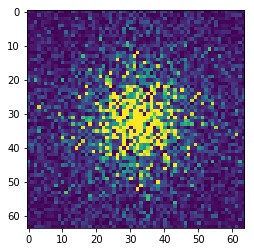

In [46]:
i = scatter_lattice(lattices[-1])
imshow(i, vmax=1000)
i.var()

21560888462.34375

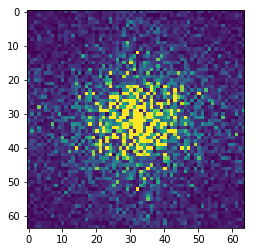

In [48]:
i2 = (scatter_lattice(lattices[-50]) + scatter_lattice(lattices[-1])) / 2.0
imshow(i2, vmax=1000)
i2.var()